Problem Statement: Exploratory Data Analysis for Charging Events

Background: You have access to a dataset containing information about charging events at various charging stations. Your task is to conduct exploratory data analysis (EDA) on this dataset to gain insights into the charging patterns. You can find the data here https://drive.google.com/file/d/15LQgEZOo_MSMAa8-ITUt2z-TTCKVdcC1/view?usp=drive_link

Instructions: You are required to submit a comprehensive report documenting your findings from the exploratory data analysis. The report should include clear visualizations, descriptive statistics, and insights. Additionally, provide any code or scripts used for data analysis. Please complete the assignment within the provided timeframe and submit your response to gauthami@ampcontrol.io


### Preprocessing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Read data
df = pd.read_csv('Data/Charging_events_data - charging_events_meter_reading.csv')

# Convert to datetime object to extract date, month, etc
# print(df.dtypes)
df['Start Time'] = pd.to_datetime(df['Start Time'], format='%d.%m.%Y %H:%M')

df['Total Duration (h)']=df['Total Duration (s)']/3600

# Fill missing values to add to plots
# print("Missing values:")
# print(df.isna().sum())
df['Charger_name'].fillna('Missing', inplace=True)


# Add new column to analyze efficiency
df['Efficiency'] = df['Meter Total(Wh)']/df['Total Duration (s)']
print('Number of data with 0 efficiency: ' + str((df['Efficiency']==0).sum()))
print('Number of data with infinite efficiency: ' + str((df['Efficiency']==np.inf).sum()))


# For seasonal/time analysis, create columns for month and hour
df['year_month'] = df['Start Time'].dt.to_period('M')
df['day'] = df['Start Time'].dt.strftime('%A')
df['is_weekday'] = df['Start Time'].apply(lambda x: "Yes" if x.weekday()<5 else "No")
df['hour'] = df['Start Time'].dt.hour


df.head(12)



Number of data with 0 efficiency: 34
Number of data with infinite efficiency: 23


,Start Time,Meter Start (Wh),Meter End(Wh),Meter Total(Wh),Total Duration (s),Charger_name,Total Duration (h),Efficiency,year_month,day,is_weekday,hour
0,2018-08-24 09:50:00,50,50.00,0.00,37,Missing,0.010278,0.000000,2018-08,Friday,Yes,9
1,2018-08-24 09:51:00,50,50.00,0.00,38,Missing,0.010556,0.000000,2018-08,Friday,Yes,9
2,2018-08-24 09:51:00,73,118.52,45.52,56,Missing,0.015556,0.812857,2018-08,Friday,Yes,9
3,2018-08-24 09:53:00,105,116.66,11.66,76,Missing,0.021111,0.153421,2018-08,Friday,Yes,9
4,2018-08-24 09:54:00,121,144.77,23.77,19,Missing,0.005278,1.251053,2018-08,Friday,Yes,9
5,2018-08-24 09:54:00,132,132.00,0.00,18,Missing,0.005000,0.000000,2018-08,Friday,Yes,9
6,2018-08-27 09:16:00,39,483.18,444.18,515,Missing,0.143056,0.862485,2018-08,Monday,Yes,9
7,2018-08-27 09:24:00,507,547.25,40.25,48,Missing,0.013333,0.838542,2018-08,Monday,Yes,9
8,2018-08-27 09:25:00,537,1551.37,1014.37,1052,Missing,0.292222,0.964230,2018-08,Monday,Yes,9
9,2018-08-29 08:01:00,1546,2290.81,744.81,0,charger_3,0.000000,inf,2018-08,Wednesday,Yes,8


When doing feature engineering for efficiency, some values are 0 or infinity.

0 occurs when there is a time duration recorded, but no energy recorded.
Infinity occurs when there is charge recorded but no time duration for it.

It is possible either the data is faulty or the charger is faulty. To confirm we would need more information. Maybe charge events are not necessarily “triggered” by charging.
If it is possible for a person to "trigger" a charge session without actually charging (like if simply parking their car would trigger a session) then this would explain why there are durations recorded but no charge.


In [4]:
# df[df['Charger_name']=='Missing']
# df[df['hour']==1]

### Charge station analysis

Text(0.5, 0, 'Charger number')

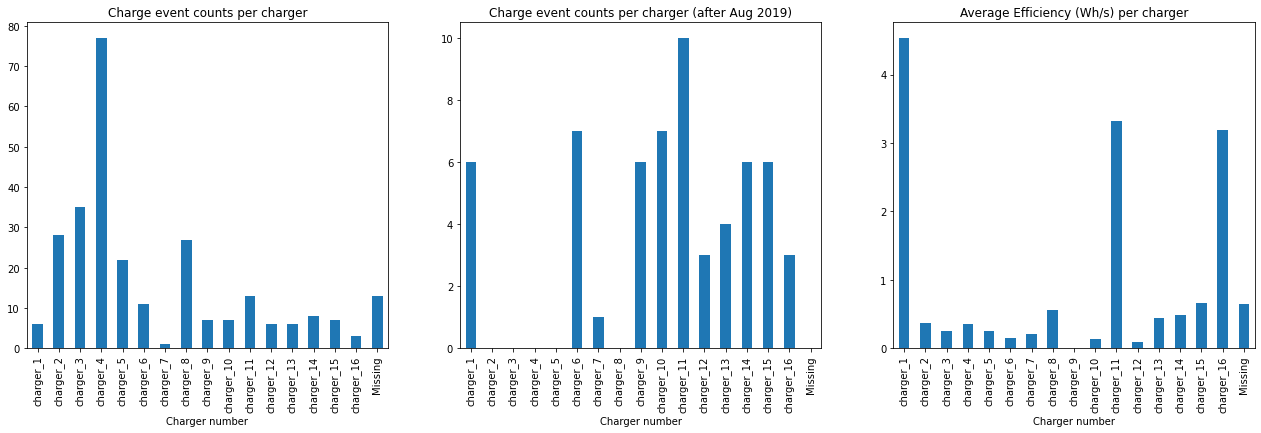

In [5]:
charger_order=['charger_1','charger_2','charger_3','charger_4','charger_5','charger_6','charger_7','charger_8','charger_9','charger_10',
               'charger_11','charger_12','charger_13','charger_14','charger_15','charger_16', 'Missing']

df_charger_count = df['Charger_name'].value_counts().reindex(charger_order)
df_charger_count_2019 = df[df['Start Time']>'2019-08-01']['Charger_name'].value_counts().reindex(charger_order)

df_charger_efficiency = df[(df['Efficiency'] != 0) & (df['Efficiency'] != np.inf)].groupby('Charger_name')['Efficiency'].mean().reindex(charger_order)

# df_charger_avg_time = df.groupby('Charger_name')['Total Duration (s)'].mean().reindex(charger_order)

fig, axs = plt.subplots(1,3, figsize=(22, 6))
ax1 = df_charger_count.plot.bar(title='Charge event counts per charger', ax=axs[0])
ax2 = df_charger_count_2019.plot.bar(title='Charge event counts per charger (after Aug 2019)', ax=axs[1])
ax3 = df_charger_efficiency.plot.bar(title='Average Efficiency (Wh/s) per charger', ax=axs[2])
ax1.set_xlabel('Charger number')
ax2.set_xlabel('Charger number')
ax3.set_xlabel('Charger number')
# ax3 = df_charger_avg_time.plot.bar(title='Average duration per charger', ax=axs[2])

Charger 4 is utilized significantly more compared to other chargers, and some chargers are utilized less. 

This could indicate a few things, such as popular charge spots or traffic. Charger 4 is probably in an area with a lot of traffic, such as a city, and charger 7 could be in a place with less traffic, like in the suburbs. This is an opportunity to optimize placement of chargers.

Alternatively, charger 7 could have some flaws. Maybe it is hard to find, for example it could be in a concealed spot in the parking lot. Or perhaps it broke after a few uses and needs maintenance.

Alternatively, these chargers could be new and there just hasn't been enough data collected yet. However this is unlikely - when accounting for charge events only after Aug 2019, chargers 7 and 16 still have lower numbers compared to other chargers.

With some feature engineering, we can also see that chargers 1, 11, and 16 have much higher charging efficiency compared to other ones. These could be special "super chargers" designed for faster charge times. Or the other chargers are possibly old and need to be updated.

Missing chargers don’t have an obvious pattern that sets them apart from other chargers, though most of the data falls in Aug 2018. This could be a flaw in the early stages of the data collection process.


### Charge duration distribution

0        68
12        3
55        3
51        2
37        1
         ..
64064     1
53821     1
49403     1
270       1
4350      1
Name: Total Duration (s), Length: 205, dtype: int64
count    277.000000
mean      26.808347
std       96.464048
min        0.000000
25%        0.003333
50%        1.584444
75%       20.399722
max      839.003056
Name: Total Duration (h), dtype: float64
1.5844444444444445


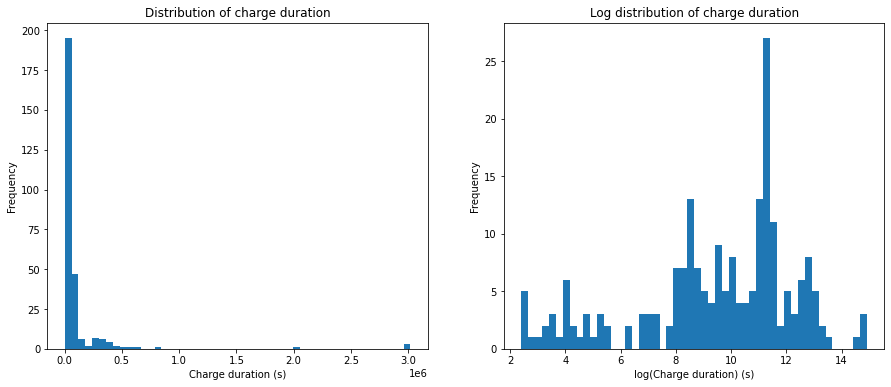

In [6]:
df_duration = df["Total Duration (s)"]
df_duration_log = np.log(df_duration[df_duration!=0])

fig, axs = plt.subplots(1,2, figsize=(15, 6))
ax1 = df_duration.plot.hist(title='Distribution of charge duration', bins=50, ax=axs[0])
ax2 = df_duration_log.plot.hist(title='Log distribution of charge duration', bins=50, ax=axs[1])
ax1.set_xlabel('Charge duration (s)')
ax2.set_xlabel('log(Charge duration) (s)')

print(df_duration.value_counts())
print(df["Total Duration (h)"].describe())
print(df["Total Duration (h)"].median())

There are two outliers, with the largest one having a duration of 839 hours. This could indicate a mistake in the data, or the battery was faulty and wouldn't charge, or the charger was faulty. Or someone possibly left their car in the charging station for a few weeks. This is dependent on the programming of the charger and how it records this data.

The median charge time is approximately 1.5 hours, mean is approximately 26 hours (influenced by large outlier), standard deviation is 9.65 hours. The large variance indicates either high variability in user charging behaviors or differences in EV battery needs. Charging stations should be ready and equipped to handle a variety of charging patterns.

There are a lot of charging events with a duration of 0, which is odd. This could be a result of flawed data, or a flawed charger, or simply drivers parking without charging, "triggering" a charge without actually charging. This could happen if simply parking your car could “trigger” a charge event. This would need more investigation on how the charger records the data.



Charge duration is highly skewed to the right, indicating people frequently charge for short durations. 

This could indicate people often "top up" their battery, leading to shorter charge sessions.
This is common if people have access to charging stations near their homes and charge on a daily basis.

Or perhaps people are charging on the go, stopping for a quick charge before hitting the road again.

This could also indicate high availability - if charging stations are easily accessible, drivers would be less inclined to charge for longer times.

This is less likely, but maybe people believe that charging for a long time could degrade their battery quality, prompting them to charge for shorter times.


### Energy distribution

0.00        79
1663.64      1
19.75        1
25381.71     1
201.78       1
            ..
3870.06      1
1568.59      1
272.45       1
6338.84      1
17109.95     1
Name: Meter Total(Wh), Length: 199, dtype: int64
count       277.000000
mean       6197.316318
std       12260.182878
min           0.000000
25%           0.000000
50%        1380.280000
75%        6822.500000
max      126350.920000
Name: Meter Total(Wh), dtype: float64
1380.28


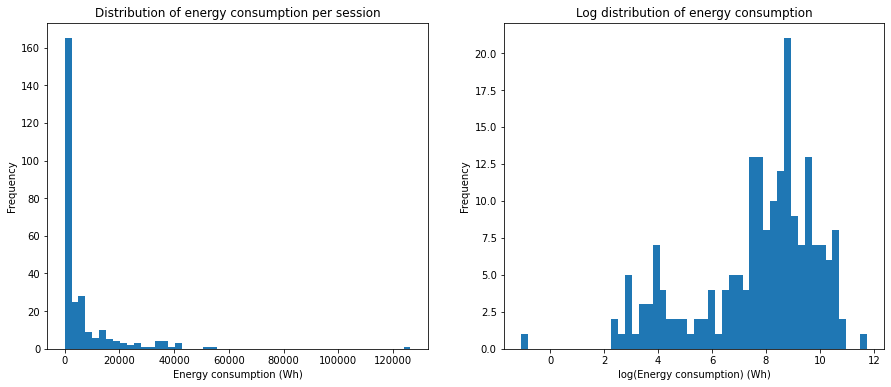

In [7]:
df_energy = df["Meter Total(Wh)"]
df_duration_log = np.log(df_energy[df_energy!=0])

fig, axs = plt.subplots(1,2, figsize=(15, 6))
ax1=df_energy.plot.hist(title='Distribution of energy consumption per session', bins=50, ax=axs[0])
ax2=df_duration_log.plot.hist(title='Log distribution of energy consumption', bins=50, ax=axs[1])
ax1.set_xlabel('Energy consumption (Wh)')
ax2.set_xlabel('log(Energy consumption) (Wh)')

print(df_energy.value_counts())
print(df_energy.describe())
print(df_energy.median())

The findings with energy consumption are consistent with charge duration.

There is also one significant outlier here, at 126351 Wh. The median is 1380 Wh, mean is 6197 Wh (influenced by far outlier), and standard deviation is 12260.




### Seasonal/Time Analysis

<AxesSubplot:title={'center':'Average efficiency (Wh/s) over months'}, xlabel='year_month'>

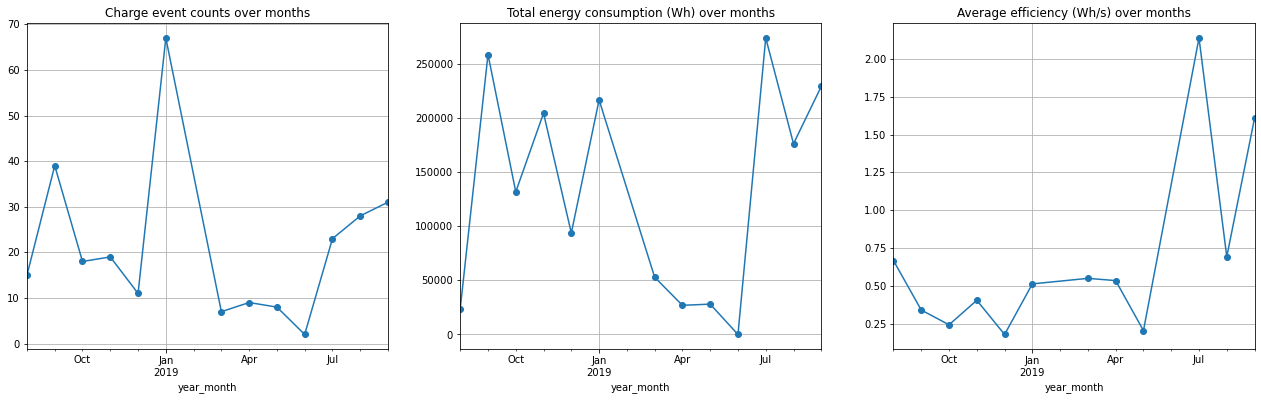

In [8]:
df_efficiency = df[(df['Efficiency'] != np.inf) & (df['Efficiency'] != 0)]

counts_per_month = df.groupby('year_month').size()
energy_per_month = df.groupby('year_month')['Meter Total(Wh)'].sum()
efficiency_per_month = df_efficiency.groupby('year_month')['Efficiency'].mean()


fig, axs = plt.subplots(1,3, figsize=(22, 6))

counts_per_month.plot.line(title='Charge event counts over months', marker='o', ax=axs[0], grid=True)
energy_per_month.plot.line(title='Total energy consumption (Wh) over months', marker='o', ax=axs[1], grid=True)
efficiency_per_month.plot.line(title='Average efficiency (Wh/s) over months', marker='o', ax=axs[2], grid=True)



January sees a spike in charge events and higher energy consumption. This could be due to people traveling during the holidays. It could also be due to special events, such as people receiving new EV cars for Christmas. 

September also sees higher charge counts and energy consumption, possibly indicating the beginning of school sessions.

Charge event counts and energy consumption rises through July-September of 2019, could be an indication of people traveling throughout the summer.

Efficiency is higher during the summer months as compared to the winter, most likely due to the cold conditions impacting the charging technology. Upgrading equipment to withstand cold conditions may improve efficiency.

Text(0.5, 1.0, 'Average charge duration (h) by weekday')

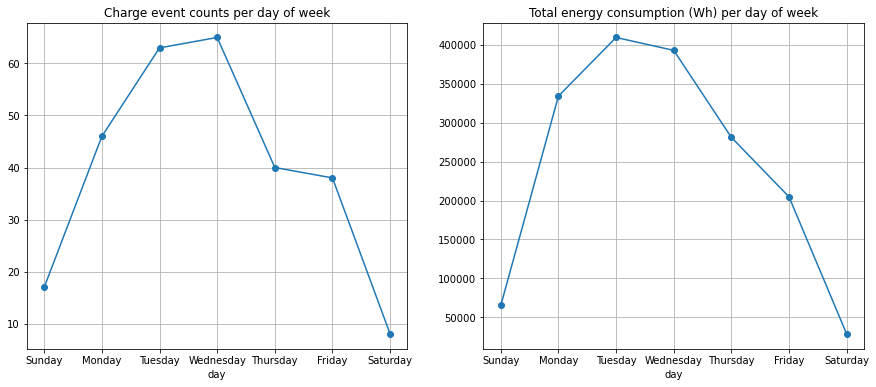

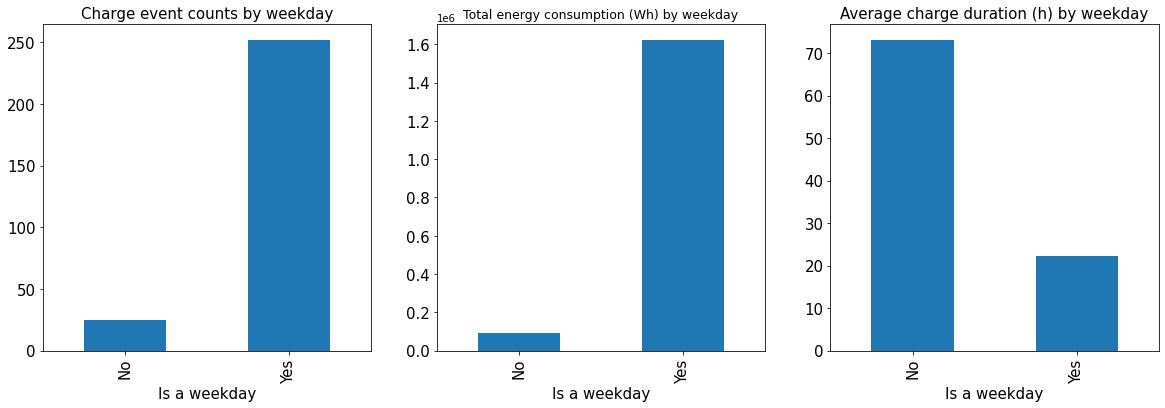

In [25]:
month_order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

counts_per_day = df.groupby('day').size().reindex(month_order)
energy_per_day = df.groupby('day')['Meter Total(Wh)'].sum().reindex(month_order)

counts_weekday = df.groupby('is_weekday').size()
energy_weekday = df.groupby('is_weekday')['Meter Total(Wh)'].sum()
duration_weekday = df.groupby('is_weekday')['Total Duration (h)'].mean()


fig, axs = plt.subplots(1,2, figsize=(15, 6))

counts_per_day.plot.line(title='Charge event counts per day of week', marker='o', ax=axs[0], grid=True)
energy_per_day.plot.line(title='Total energy consumption (Wh) per day of week', marker='o', ax=axs[1], grid=True)


fig, axs = plt.subplots(1,3, figsize=(20, 6))
counts_weekday.plot.bar(ax=axs[0], fontsize=15)
energy_weekday.plot.bar(ax=axs[1], fontsize=15)
duration_weekday.plot.bar(ax=axs[2], fontsize=15)

axs[0].set_xlabel('Is a weekday', fontsize=15)
axs[0].set_title('Charge event counts by weekday', fontsize=15)
axs[1].set_xlabel('Is a weekday', fontsize=15)
axs[1].set_title('Total energy consumption (Wh) by weekday', fontsize=12.5)
axs[2].set_xlabel('Is a weekday', fontsize=15)
axs[2].set_title('Average charge duration (h) by weekday', fontsize=15)

Drivers tend to charge at the beginning of the work week. Weekdays see more charge events and more energy consumption, which makes sense considering people have to drive to work.
The average charge duration is much longer on weekends, probably because people have more time to charge. On weekdays people are more likely to charge on the go. 


<AxesSubplot:title={'center':'Average duration (h) over hours'}, xlabel='hour'>

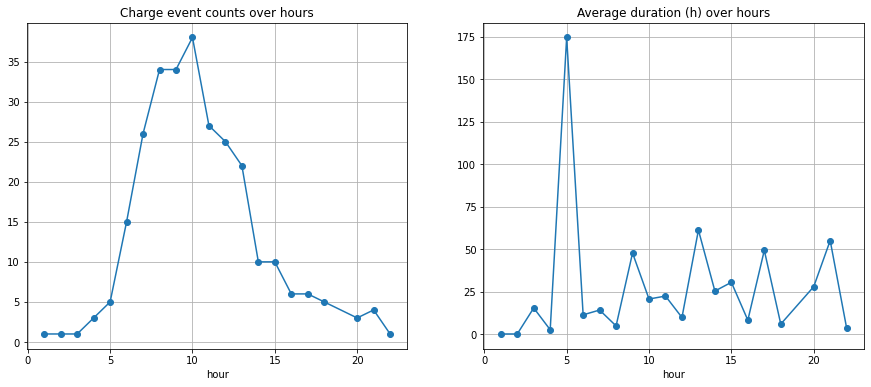

In [11]:
counts_per_hour = df.groupby('hour').size()
duration_per_hour = df.groupby('hour')['Total Duration (h)'].mean()


fig, axs = plt.subplots(1,2, figsize=(15, 6))

counts_per_hour.plot.line(title='Charge event counts over hours', marker='o', ax=axs[0], grid=True)
duration_per_hour.plot.line(title='Average duration (h) over hours', marker='o', ax=axs[1], grid=True)

The number of charge events throughout the day has a unimodal distribution, peaking at 10am. People tend to charge their vehicles throughout the day for shorter durations. Total energy consumption is higher throughout the day.

But at night, on average, an individual driver tends to use more energy per charge event. This could be an indicator of overnight charging.

Looking at average energy consumption and charge duration, individual drivers tend to charge for longer durations early before work at 5am.


<AxesSubplot:title={'center':'Average energy consumption (Wh) over hours'}, xlabel='hour'>

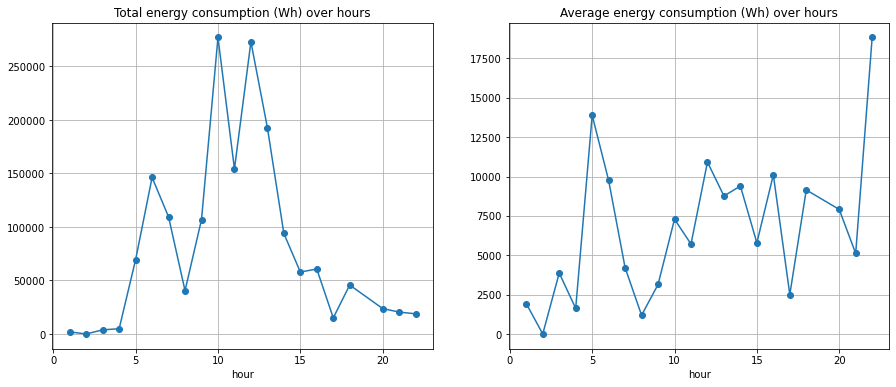

In [12]:
avg_energy_per_hour = df.groupby('hour')['Meter Total(Wh)'].mean()
energy_per_hour = df.groupby('hour')['Meter Total(Wh)'].sum()

fig, axs = plt.subplots(1,2, figsize=(15, 6))

energy_per_hour.plot.line(title='Total energy consumption (Wh) over hours', marker='o', ax=axs[0], grid=True)
avg_energy_per_hour.plot.line(title='Average energy consumption (Wh) over hours', marker='o', grid=True, ax=axs[1])